In [2]:
!pip install scikit-learn scikit-image numpy pandas opencv-python

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
from sklearn import svm
import numpy as np

In [62]:
#import data
ds = fetch_openml('mnist_784', as_frame = False )
x, x_test , y, y_test = train_test_split (ds.data, ds.target, test_size = 0.2, random_state = 42)
print(f"X set size: {x.shape}")
print(f"Y set size: {y.shape}")
print(f"X Test set size: {x_test.shape}")
print(f"Y Test set size: {y_test.shape}")


X set size: (56000, 784)
Y set size: (56000,)
X Test set size: (14000, 784)
Y Test set size: (14000,)


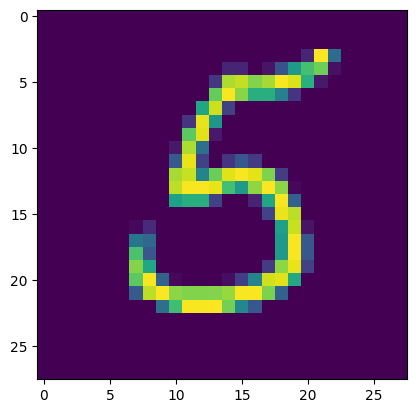

In [29]:
a = x[0].reshape((28, 28))
plt.imshow(a)

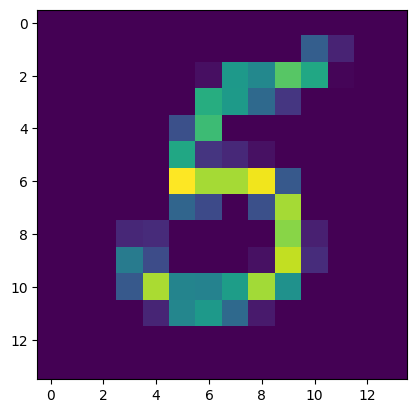

In [30]:
a_uint8 = cv2.normalize(a, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
b = cv2.resize(a_uint8, (14, 14))
plt.imshow(b)

In [63]:
def downscale(imgs):
  imgs = imgs.reshape(-1, 28, 28).astype(np.uint8)
  imgs = np.array([cv2.resize(img, (14, 14)) for img in imgs])
  imgs = imgs.reshape(imgs.shape[0], -1).astype(np.float32) / 255.0
  return imgs

In [64]:
# Create a smaller dataset with 1000 samples per digit more efficiently (5 lines max)
n_samples_per_digit = 1000
subset_indices = []
for digit in range(10):  # Hardcoded digits from 0 to 9
    indices = np.where(y.astype(int) == digit)[0]
    subset_indices.extend(np.random.choice(indices, n_samples_per_digit, replace=False))

x_subset = x[subset_indices]
x_subset = downscale(x_subset)
y_subset = y[subset_indices]
x_train, x_val, y_train, y_val = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset)
print(f"Subset dataset size: {len(x_subset)}")
print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")

Subset dataset size: 10000
Training set size: 8000
Validation set size: 2000


In [46]:
classifier = svm.SVC(C=1.0, kernel='rbf', gamma='auto')
print("SVM classifier created successfully")

SVM classifier created successfully


In [67]:
classifier.fit(x_train, y_train)
print("Training completed!")

Training completed!


In [66]:
x_test = downscale(x_test)
x_test.shape, y_test.shape

((14000, 196), (14000,))

Prediction completed!
Validation Error: 0.09199999999999997
Ratio of support vectors to training samples: 0.580625
Test Error: 0.08757142857142852
['8' '4' '8' ... '2' '7' '1'] ['8' '4' '5' ... '2' '7' '1']


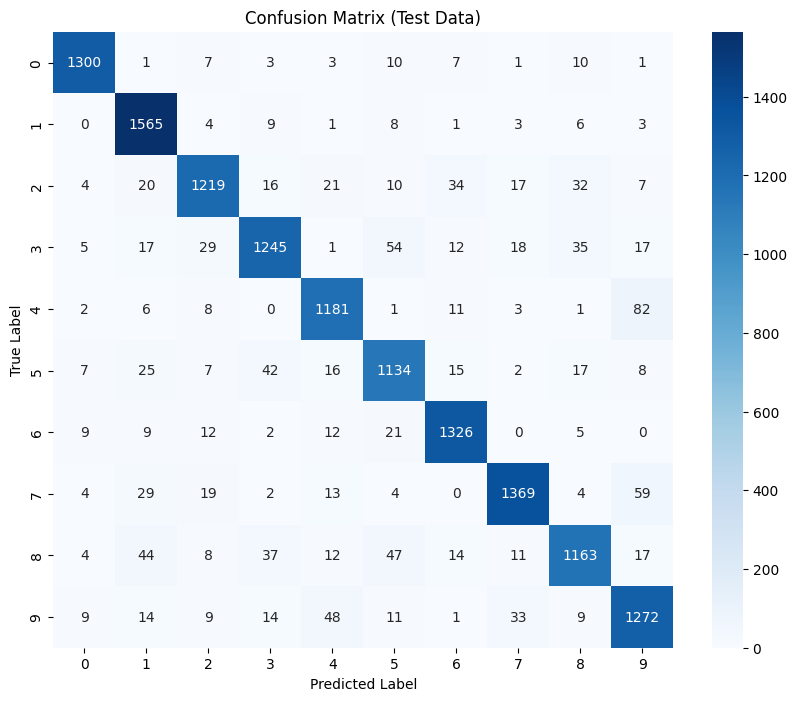

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_pred = classifier.predict(x_val)
print("Prediction completed!")

validation_error = 1 - accuracy_score(y_val, y_pred)
print(f'Validation Error: {validation_error}')

support_vector_ratio = len(classifier.support_vectors_) / len(x_train)
print(f'Ratio of support vectors to training samples: {support_vector_ratio}')

y_test_pred = classifier.predict(x_test)
test_error = 1 - accuracy_score(y_test, y_test_pred)
print(f'Test Error: {test_error}')
print(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [69]:
classifier = svm.SVC(C=1.0, kernel='rbf', gamma='auto')

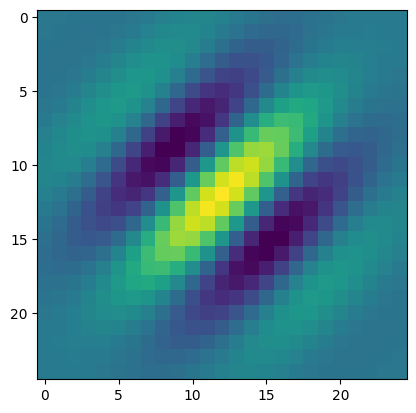

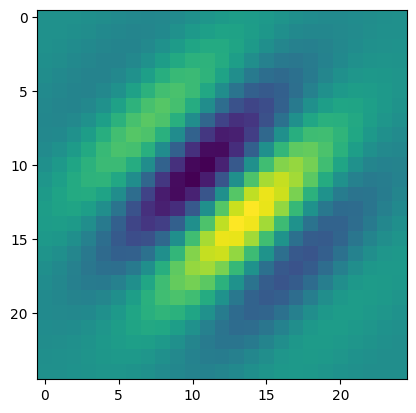

In [70]:
from skimage.filters import gabor, gabor_kernel

freq, theta , bandwidth = 0.1, np.pi/4, 1
gk = gabor_kernel(frequency=freq, theta=theta, bandwidth=bandwidth)
plt.figure (1); plt.clf (); plt.imshow (gk.real)
plt.figure (2); plt.clf (); plt.imshow (gk.imag)

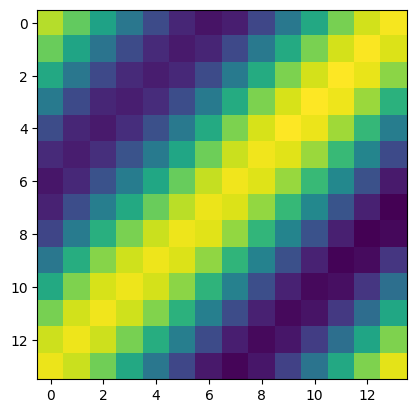

In [73]:
image = x_train[0].reshape((14, 14))
coeff_real, _ = gabor(image, frequency = freq, theta = theta, bandwidth = bandwidth)
plt.figure(1); plt.clf(); plt.imshow(coeff_real)

In [74]:
theta = np.arange (0,np.pi ,np.pi/4)
frequency = np.arange (0.05 ,0.5,0.15)
bandwidth = np.arange (0.3,1,0.3)

In [76]:
grid = np.array(np.meshgrid(theta, frequency, bandwidth)).T.reshape(-1, len([theta, frequency, bandwidth]))
grid.shape

(36, 3)

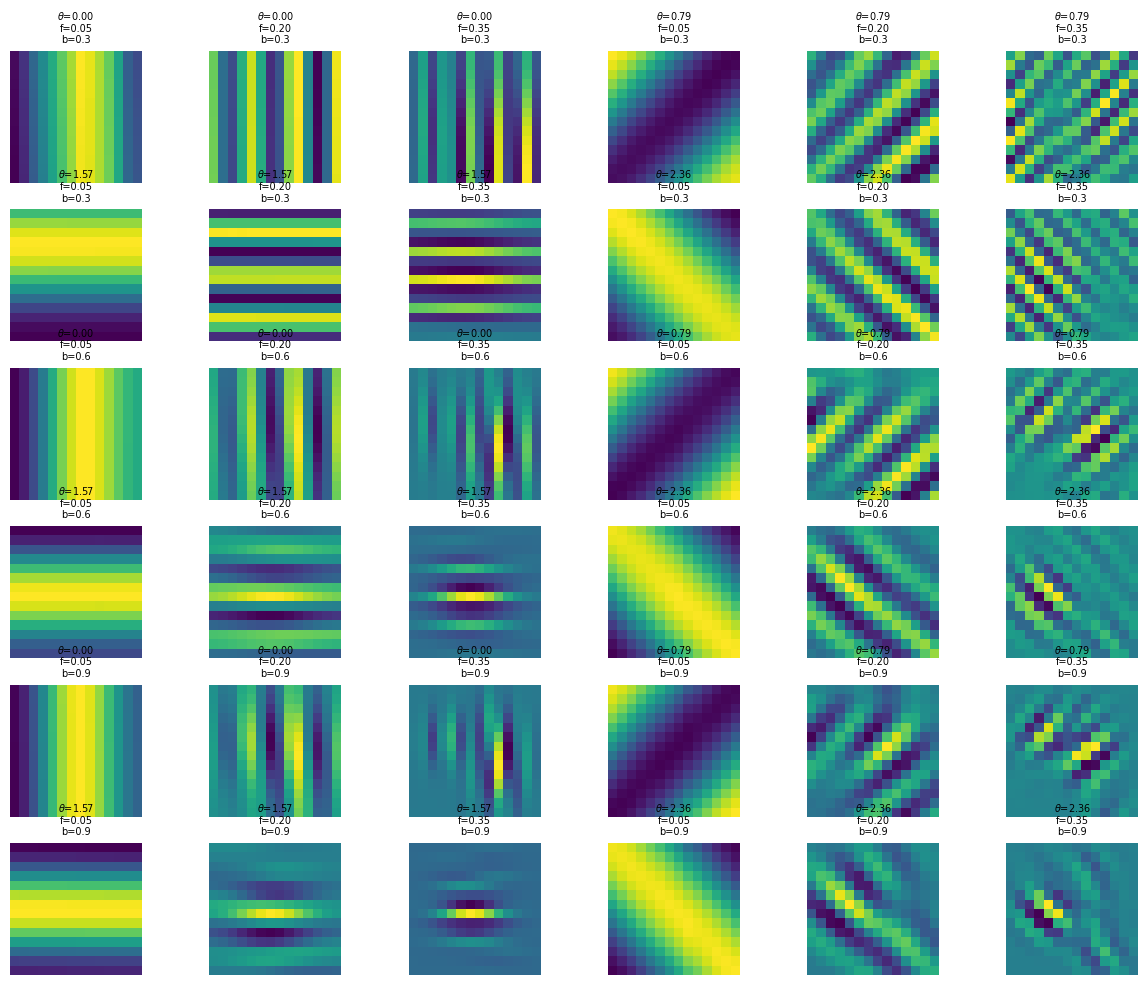

In [81]:
num_plots = grid.shape[0]
cols = 6
rows = (num_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()
filters = []

for i, params in enumerate(grid):
    theta, freq, bandwidth = params
    coeff_real, _ = gabor(image, frequency=freq, theta=theta, bandwidth=bandwidth)
    filters.append(coeff_real)

    ax = axes[i]
    ax.imshow(coeff_real)
    ax.set_title(f"$\\theta$={theta:.2f}\nf={freq:.2f}\nb={bandwidth:.1f}", fontsize=7)
    ax.axis('off')

In [95]:
# Create a smaller dataset with 1000 samples per digit more efficiently (5 lines max)
n_samples_per_digit = 100
subset_indices = []
for digit in range(10):  # Hardcoded digits from 0 to 9
    indices = np.where(y.astype(int) == digit)[0]
    subset_indices.extend(np.random.choice(indices, n_samples_per_digit, replace=False))

x_subset = x[subset_indices]
x_subset = downscale(x_subset)
y_subset = y[subset_indices]
x_train, x_val, y_train, y_val = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset)
print(f"Subset dataset size: {len(x_subset)}")
print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}")

Subset dataset size: 1000
Training set size: 800
Validation set size: 200


In [96]:
def gabor_features(img, filters):
    feats = []
    for kern in filters:
        img_float32 = img.astype(np.float32)
        fimg = cv2.filter2D(img_float32, cv2.CV_32F, kern)
        feats.extend(fimg.flatten())
    return np.array(feats)

gabor_data_train = np.array([gabor_features(img.reshape(14, 14), filters) for img in x_train])
gabor_data_test = np.array([gabor_features(img.reshape(14, 14), filters) for img in x_val])

In [91]:
gabor_data_train.shape, gabor_data_test.shape

(800, 7056)

In [92]:
gabor_classifier = svm.SVC(C=1.0, kernel='rbf', gamma='auto')
print("SVM classifier created successfully")
gabor_classifier.fit(gabor_data_train, y_train)
print("Training completed!")

SVM classifier created successfully
Training completed!


Prediction completed!
Training Accuracy: 0.6425
Validation Accuracy: 0.655


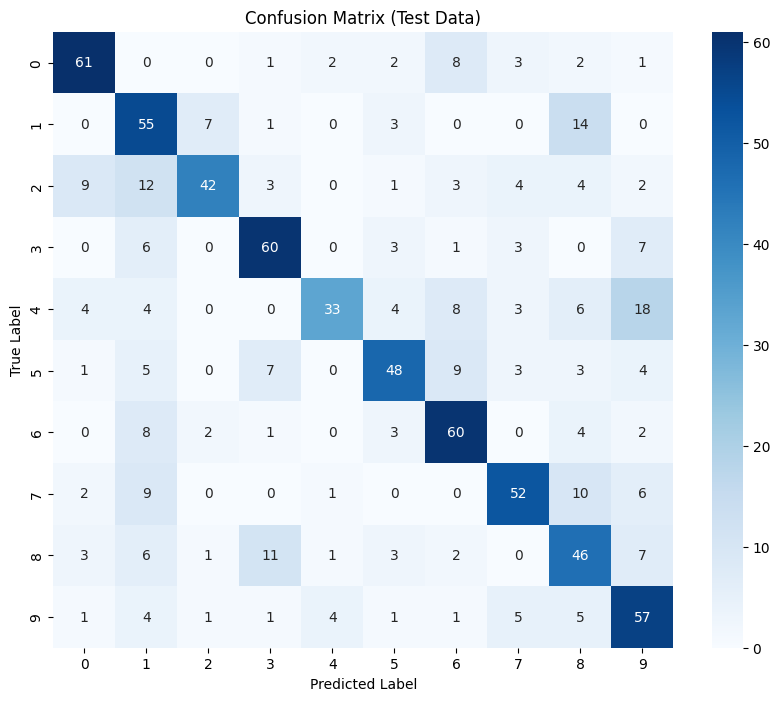

In [99]:
y_pred_train = gabor_classifier.predict(gabor_data_train)
y_pred_val = gabor_classifier.predict(gabor_data_test)
print("Prediction completed!")
training_acc = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {training_acc}')
validation_acc = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {validation_acc}')

conf_matrix = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()

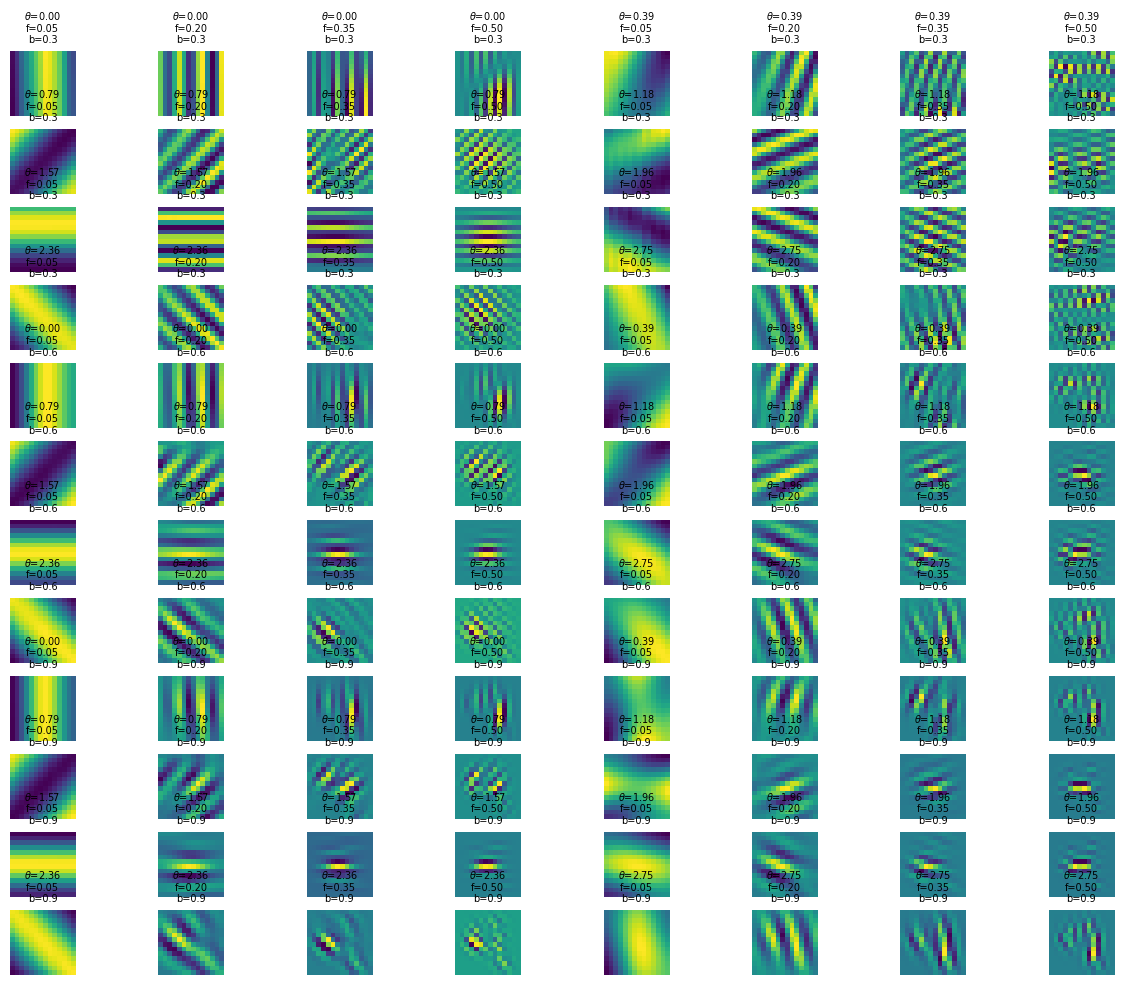

In [101]:
#More filters
theta = np.linspace(0, np.pi, 8, endpoint=False)
frequency = np.linspace(0.05, 0.5, 4)
bandwidth = np.linspace(0.3, 0.9, 3)
grid = np.array(np.meshgrid(theta, frequency, bandwidth)).T.reshape(-1, len([theta, frequency, bandwidth]))
num_plots = grid.shape[0]
cols = 8
rows = (num_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()
filters = []

for i, params in enumerate(grid):
    theta, freq, bandwidth = params
    coeff_real, _ = gabor(image, frequency=freq, theta=theta, bandwidth=bandwidth)
    filters.append(coeff_real)

    ax = axes[i]
    ax.imshow(coeff_real)
    ax.set_title(f"$\\theta$={theta:.2f}\nf={freq:.2f}\nb={bandwidth:.1f}", fontsize=7)
    ax.axis('off')

In [103]:
def gabor_features(img, filters):
    feats = []
    for kern in filters:
        img_float32 = img.astype(np.float32)
        fimg = cv2.filter2D(img_float32, cv2.CV_32F, kern)
        feats.extend(fimg.flatten())
    return np.array(feats)

gabor_data_train = np.array([gabor_features(img.reshape(14, 14), filters) for img in x_train])
gabor_data_val = np.array([gabor_features(img.reshape(14, 14), filters) for img in x_val])

In [106]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# simple pipeline, 95 percent explained variance

pipe = make_pipeline(
    StandardScaler(with_mean=True, with_std=True),
    PCA(n_components=0.95, svd_solver="auto", random_state=42), # Changed svd_solver to 'auto'
    svm.SVC(kernel="rbf", gamma="auto")
)

pipe.fit(gabor_data_train, y_train)
print("score", pipe.score(gabor_data_val, y_val))

score 0.105
